In [1]:
import numpy as np
import pandas as pd

train =pd.read_csv(r'C:\Users\user\Downloads\kfk\Big Mart sales/Train_UWu5bXk.csv')
test =pd.read_csv(r'C:\Users\user\Downloads\kfk\Big Mart sales/Test_u94Q5KV.csv')

train.shape ,test.shape

train['source']='train'
test['source']='test'

data= pd.concat([train,test],ignore_index=False)

data.shape

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if sys.path[0] == '':


(14204, 13)

In [2]:
data.describe()

,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Establishment_Year
count,14204.000000,8523.000000,14204.000000,11765.000000,14204.000000
mean,141.004977,2181.288914,0.065953,12.792854,1997.830681
std,62.086938,1706.499616,0.051459,4.652502,8.371664
min,31.290000,33.290000,0.000000,4.555000,1985.000000
25%,94.012000,834.247400,0.027036,8.710000,1987.000000
50%,142.247000,1794.331000,0.054021,12.600000,1999.000000
75%,185.855600,3101.296400,0.094037,16.750000,2004.000000
max,266.888400,13086.964800,0.328391,21.350000,2009.000000


In [3]:
data.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,Tier 1,Medium,Supermarket Type1,train
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2,train
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,Tier 1,Medium,Supermarket Type1,train
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.000000,19.20,1998,OUT010,Tier 3,NaN,Grocery Store,train
4,Low Fat,NCD19,53.8614,994.7052,Household,0.000000,8.93,1987,OUT013,Tier 3,High,Supermarket Type1,train


In [4]:
data.isnull().sum()

Item_Fat_Content                0
Item_Identifier                 0
Item_MRP                        0
Item_Outlet_Sales            5681
Item_Type                       0
Item_Visibility                 0
Item_Weight                  2439
Outlet_Establishment_Year       0
Outlet_Identifier               0
Outlet_Location_Type            0
Outlet_Size                  4016
Outlet_Type                     0
source                          0
dtype: int64

In [5]:
data.Item_Fat_Content.value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

In [6]:
data['Item_Fat_Content']= data['Item_Fat_Content'].replace('LF', 'Low Fat')
data['Item_Fat_Content']= data['Item_Fat_Content'].replace('low fat', 'Low Fat')
data['Item_Fat_Content']= data['Item_Fat_Content'].replace('reg', 'Regular')

In [7]:
data.Item_Fat_Content.value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [8]:
data.Item_Type.value_counts()

Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

In [9]:
data[(data['source']=='train') & (data['Item_Weight'].isnull())]

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source
7,Low Fat,FDP10,107.7622,4022.7636,Snack Foods,0.127470,NaN,1985,OUT027,Tier 3,Medium,Supermarket Type3,train
18,Low Fat,DRI11,113.2834,2303.6680,Hard Drinks,0.034238,NaN,1985,OUT027,Tier 3,Medium,Supermarket Type3,train
21,Regular,FDW12,144.5444,4064.0432,Baking Goods,0.035400,NaN,1985,OUT027,Tier 3,Medium,Supermarket Type3,train
23,Low Fat,FDC37,107.6938,214.3876,Baking Goods,0.057557,NaN,1985,OUT019,Tier 1,Small,Grocery Store,train
29,Regular,FDC14,43.6454,125.8362,Canned,0.072222,NaN,1985,OUT019,Tier 1,Small,Grocery Store,train
36,Regular,FDV20,128.0678,2797.6916,Fruits and Vegetables,0.059512,NaN,1985,OUT027,Tier 3,Medium,Supermarket Type3,train
38,Regular,FDX10,36.9874,388.1614,Snack Foods,0.123111,NaN,1985,OUT027,Tier 3,Medium,Supermarket Type3,train
39,Low Fat,FDB34,87.6198,2180.4950,Snack Foods,0.026481,NaN,1985,OUT027,Tier 3,Medium,Supermarket Type3,train
49,Regular,FDS02,196.8794,780.3176,Dairy,0.255395,NaN,1985,OUT019,Tier 1,Small,Grocery Store,train
59,Low Fat,FDI26,180.0344,892.1720,Canned,0.061082,NaN,1985,OUT019,Tier 1,Small,Grocery Store,train


In [10]:
data[data['Item_Identifier']=='DRA12']

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source
118,Low Fat,DRA12,140.3154,2552.6772,Soft Drinks,0.041178,11.6,2007,OUT017,Tier 2,NaN,Supermarket Type1,train
1197,Low Fat,DRA12,141.6154,3829.0158,Soft Drinks,0.000000,11.6,2002,OUT045,Tier 2,NaN,Supermarket Type1,train
1245,Low Fat,DRA12,142.3154,2552.6772,Soft Drinks,0.040912,11.6,1987,OUT013,Tier 3,High,Supermarket Type1,train
1693,Low Fat,DRA12,141.9154,992.7078,Soft Drinks,0.000000,11.6,2004,OUT035,Tier 2,Small,Supermarket Type1,train
7467,Low Fat,DRA12,142.0154,850.8924,Soft Drinks,0.041113,11.6,2009,OUT018,Tier 3,Medium,Supermarket Type2,train
8043,Low Fat,DRA12,143.0154,283.6308,Soft Drinks,0.068535,11.6,1998,OUT010,Tier 3,NaN,Grocery Store,train
500,Low Fat,DRA12,142.9154,NaN,Soft Drinks,0.040946,11.6,1997,OUT046,Tier 1,Small,Supermarket Type1,test
3912,Low Fat,DRA12,140.0154,NaN,Soft Drinks,0.040748,NaN,1985,OUT027,Tier 3,Medium,Supermarket Type3,test
5081,Low Fat,DRA12,141.0154,NaN,Soft Drinks,0.041010,11.6,1999,OUT049,Tier 1,Medium,Supermarket Type1,test


In [11]:
data['Item_Weight'] = data.groupby('Item_Identifier')['Item_Weight'].transform(lambda x : x.fillna(x.mean()))

In [12]:
data.isnull().sum()

Item_Fat_Content                0
Item_Identifier                 0
Item_MRP                        0
Item_Outlet_Sales            5681
Item_Type                       0
Item_Visibility                 0
Item_Weight                     0
Outlet_Establishment_Year       0
Outlet_Identifier               0
Outlet_Location_Type            0
Outlet_Size                  4016
Outlet_Type                     0
source                          0
dtype: int64

In [13]:
data['Identifier']=data['Item_Identifier'].str.slice(0,2)

data['Identifier']=data['Identifier'].map({'FD': 'Food','NC':'Non Consumable','DR':'Drink'})

data.loc[data['Identifier']=='Non Consumable','Item_Fat_Content']='Non Edible'

data.loc[((data['Identifier']=='Drink')&(data['Item_Type']=='Dairy')),'Item_Type']='Dairy_Drink'

data.loc[((data['Identifier']=='Drink')&(data['Item_Fat_Content']=='Low Fat')),'Item_Fat_Content']='Low Fat Drink'

data.loc[((data['Identifier']=='Drink')&(data['Item_Fat_Content']=='Regular')),'Item_Fat_Content']='Regular Drink'

In [14]:
data.Item_Fat_Content.value_counts()

Low Fat          5291
Regular          4910
Non Edible       2686
Low Fat Drink    1208
Regular Drink     109
Name: Item_Fat_Content, dtype: int64

In [15]:
data.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source,Identifier
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,Tier 1,Medium,Supermarket Type1,train,Food
1,Regular Drink,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2,train,Drink
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,Tier 1,Medium,Supermarket Type1,train,Food
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.000000,19.20,1998,OUT010,Tier 3,NaN,Grocery Store,train,Food
4,Non Edible,NCD19,53.8614,994.7052,Household,0.000000,8.93,1987,OUT013,Tier 3,High,Supermarket Type1,train,Non Consumable


In [16]:
data[data['Item_Visibility']==0]

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source,Identifier
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.0,19.200,1998,OUT010,Tier 3,NaN,Grocery Store,train,Food
4,Non Edible,NCD19,53.8614,994.7052,Household,0.0,8.930,1987,OUT013,Tier 3,High,Supermarket Type1,train,Non Consumable
5,Regular,FDP36,51.4008,556.6088,Baking Goods,0.0,10.395,2009,OUT018,Tier 3,Medium,Supermarket Type2,train,Food
10,Low Fat,FDY07,45.5402,1516.0266,Fruits and Vegetables,0.0,11.800,1999,OUT049,Tier 1,Medium,Supermarket Type1,train,Food
32,Low Fat,FDP33,256.6672,3068.0064,Snack Foods,0.0,18.700,2009,OUT018,Tier 3,Medium,Supermarket Type2,train,Food
33,Low Fat,FDO23,93.1436,2174.5028,Breads,0.0,17.850,2002,OUT045,Tier 2,NaN,Supermarket Type1,train,Food
46,Non Edible,NCP05,153.3024,2428.8384,Health and Hygiene,0.0,19.600,2002,OUT045,Tier 2,NaN,Supermarket Type1,train,Non Consumable
60,Low Fat,FDM20,246.9144,3185.1872,Fruits and Vegetables,0.0,10.000,2009,OUT018,Tier 3,Medium,Supermarket Type2,train,Food
72,Low Fat,FDH35,164.7526,4604.6728,Starchy Foods,0.0,18.250,2002,OUT045,Tier 2,NaN,Supermarket Type1,train,Food
79,Low Fat,FDV25,222.5456,5305.0944,Canned,0.0,5.905,2002,OUT045,Tier 2,NaN,Supermarket Type1,train,Food


In [17]:
data[data['Item_Identifier']=='DRE12']

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source,Identifier
884,Low Fat Drink,DRE12,112.886,2942.836,Soft Drinks,0.070438,4.59,1985,OUT027,Tier 3,Medium,Supermarket Type3,train,Drink
1082,Low Fat Drink,DRE12,111.686,1584.604,Soft Drinks,0.070891,4.59,1999,OUT049,Tier 1,Medium,Supermarket Type1,train,Drink
1515,Low Fat Drink,DRE12,114.586,1245.046,Soft Drinks,0.070781,4.59,1997,OUT046,Tier 1,Small,Supermarket Type1,train,Drink
3077,Low Fat Drink,DRE12,111.986,792.302,Soft Drinks,0.070767,4.59,2004,OUT035,Tier 2,Small,Supermarket Type1,train,Drink
6432,Low Fat Drink,DRE12,113.286,1471.418,Soft Drinks,0.070722,4.59,1987,OUT013,Tier 3,High,Supermarket Type1,train,Drink
7984,Low Fat Drink,DRE12,111.186,1245.046,Soft Drinks,0.000000,4.59,2002,OUT045,Tier 2,NaN,Supermarket Type1,train,Drink
1303,Low Fat Drink,DRE12,114.186,NaN,Soft Drinks,0.071181,4.59,2007,OUT017,Tier 2,NaN,Supermarket Type1,test,Drink
2377,Low Fat Drink,DRE12,113.086,NaN,Soft Drinks,0.071069,4.59,2009,OUT018,Tier 3,Medium,Supermarket Type2,test,Drink


In [18]:
data.loc[data['Item_Visibility']==0,'Item_Visibility']=np.nan

data['Item_Visibility']=data.groupby('Item_Identifier')['Item_Visibility'].transform(lambda x : x.fillna(x.mean()))

In [19]:
#visibility_avg = data.groupby('Item_Identifier')['Item_Visibility'].mean()

#bool= data['Item_Visibility']==0

#data.loc[bool,'Item_Visibility']= data.loc[bool,'Item_Identifier'].apply(lambda x : visibility_avg[x])

In [20]:
data.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source,Identifier
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,Tier 1,Medium,Supermarket Type1,train,Food
1,Regular Drink,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2,train,Drink
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,Tier 1,Medium,Supermarket Type1,train,Food
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.022930,19.20,1998,OUT010,Tier 3,NaN,Grocery Store,train,Food
4,Non Edible,NCD19,53.8614,994.7052,Household,0.014670,8.93,1987,OUT013,Tier 3,High,Supermarket Type1,train,Non Consumable


In [21]:
data['years of operation']=2013-data['Outlet_Establishment_Year']

data['Outlet_Size']=data['Outlet_Size'].replace(np.nan,'o')

In [22]:
pd.crosstab([data.Outlet_Identifier,data.Outlet_Type,data.Outlet_Location_Type, data.Outlet_Establishment_Year],data.Outlet_Size)

,,,Outlet_Size,High,Medium,Small,o
Outlet_Identifier,Outlet_Type,Outlet_Location_Type,Outlet_Establishment_Year,,,,
OUT010,Grocery Store,Tier 3,1998,0,0,0,925
OUT013,Supermarket Type1,Tier 3,1987,1553,0,0,0
OUT017,Supermarket Type1,Tier 2,2007,0,0,0,1543
OUT018,Supermarket Type2,Tier 3,2009,0,1546,0,0
OUT019,Grocery Store,Tier 1,1985,0,0,880,0
OUT027,Supermarket Type3,Tier 3,1985,0,1559,0,0
OUT035,Supermarket Type1,Tier 2,2004,0,0,1550,0
OUT045,Supermarket Type1,Tier 2,2002,0,0,0,1548
OUT046,Supermarket Type1,Tier 1,1997,0,0,1550,0


In [23]:
data.loc[((data['Outlet_Type']=='Grocery Store')&(data['Outlet_Establishment_Year']==1998)),'Outlet_Size']='Medium'

data.loc[((data['Outlet_Type']=='Supermarket Type1')&(data['Outlet_Establishment_Year']==2007)),'Outlet_Size']='Medium'

data.loc[((data['Outlet_Type']=='Supermarket Type1')&(data['Outlet_Establishment_Year']==2002)),'Outlet_Size']='Small'

In [24]:
data.isnull().sum()

Item_Fat_Content                0
Item_Identifier                 0
Item_MRP                        0
Item_Outlet_Sales            5681
Item_Type                       0
Item_Visibility                 0
Item_Weight                     0
Outlet_Establishment_Year       0
Outlet_Identifier               0
Outlet_Location_Type            0
Outlet_Size                     0
Outlet_Type                     0
source                          0
Identifier                      0
years of operation              0
dtype: int64

In [25]:
data['No_of_sold_item']=data['Item_Outlet_Sales']/data['Item_MRP']

data.drop(['Outlet_Establishment_Year','Item_Outlet_Sales'],axis=1,inplace=True)

data['MRP_per_weight']=data['Item_MRP']/data['Item_Weight']

In [26]:
data.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Type,Item_Visibility,Item_Weight,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source,Identifier,years of operation,No_of_sold_item,MRP_per_weight
0,Low Fat,FDA15,249.8092,Dairy,0.016047,9.30,OUT049,Tier 1,Medium,Supermarket Type1,train,Food,14,14.951963,26.861204
1,Regular Drink,DRC01,48.2692,Soft Drinks,0.019278,5.92,OUT018,Tier 3,Medium,Supermarket Type2,train,Drink,4,9.186454,8.153581
2,Low Fat,FDN15,141.6180,Meat,0.016760,17.50,OUT049,Tier 1,Medium,Supermarket Type1,train,Food,14,14.809346,8.092457
3,Regular,FDX07,182.0950,Fruits and Vegetables,0.022930,19.20,OUT010,Tier 3,Medium,Grocery Store,train,Food,15,4.021967,9.484115
4,Non Edible,NCD19,53.8614,Household,0.014670,8.93,OUT013,Tier 3,High,Supermarket Type1,train,Non Consumable,26,18.467868,6.031512


In [27]:
visibility_avg = data.groupby('Item_Identifier')['Item_Visibility'].mean()

data['Item_Visibility_MeanRatio'] = data.apply(lambda x: x['Item_Visibility']/visibility_avg[x['Item_Identifier']], axis=1)

list1=['Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Location_Type','Outlet_Size','Outlet_Type','Identifier']

In [28]:
for col in list1:
    dummies=pd.get_dummies(data[col],drop_first=True,prefix=col)
    data = pd.concat([data,dummies],axis=1)
    del data[col]
del dummies

In [29]:
data.drop('Item_Identifier',axis=1,inplace=True)

In [30]:
data.shape

(14204, 46)

In [31]:
data.dtypes

Item_MRP                           float64
Item_Visibility                    float64
Item_Weight                        float64
source                              object
years of operation                   int64
No_of_sold_item                    float64
MRP_per_weight                     float64
Item_Visibility_MeanRatio          float64
Item_Fat_Content_Low Fat Drink       uint8
Item_Fat_Content_Non Edible          uint8
Item_Fat_Content_Regular             uint8
Item_Fat_Content_Regular Drink       uint8
Item_Type_Breads                     uint8
Item_Type_Breakfast                  uint8
Item_Type_Canned                     uint8
Item_Type_Dairy                      uint8
Item_Type_Dairy_Drink                uint8
Item_Type_Frozen Foods               uint8
Item_Type_Fruits and Vegetables      uint8
Item_Type_Hard Drinks                uint8
Item_Type_Health and Hygiene         uint8
Item_Type_Household                  uint8
Item_Type_Meat                       uint8
Item_Type_O

In [32]:
train= data.loc[data['source']=='train']
test= data.loc[data['source']=='test']

In [33]:
train.shape,test.shape

((8523, 46), (5681, 46))

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
train, test1 = train_test_split(train, test_size = 0.2, random_state =2)

In [36]:
train.head()

,Item_MRP,Item_Visibility,Item_Weight,source,years of operation,No_of_sold_item,MRP_per_weight,Item_Visibility_MeanRatio,Item_Fat_Content_Low Fat Drink,Item_Fat_Content_Non Edible,...,Outlet_Identifier_OUT049,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Identifier_Food,Identifier_Non Consumable
7173,149.9366,0.057422,11.800,train,16,11.088037,12.706492,0.913579,0,0,...,0,0,0,0,1,1,0,0,1,0
3315,100.1384,0.050685,6.150,train,28,29.520663,16.282667,1.000000,0,0,...,0,0,1,1,0,0,0,1,1,0
5932,249.1092,0.047783,7.725,train,16,9.995986,32.247146,0.863189,0,0,...,0,0,0,0,1,1,0,0,1,0
7872,89.6830,0.052555,10.500,train,16,11.024531,8.541238,0.929633,0,0,...,0,0,0,0,1,1,0,0,1,0
5946,46.1402,0.235859,7.630,train,28,0.995665,6.047208,1.531537,0,0,...,0,0,0,0,1,0,0,0,1,0


In [37]:
y_train = train['No_of_sold_item']
y_test = test['No_of_sold_item']
x_train = train.drop(['No_of_sold_item','source'],axis=1)
x_test = test.drop(['No_of_sold_item','source'],axis=1)

In [38]:
y_test1 = test1['No_of_sold_item']
x_test1 = test1.drop(['No_of_sold_item','source'],axis=1)

In [40]:
#x_train=train.drop(['No_of_sold_item'],1)
#y_train=train['No_of_sold_item']

#train.drop('source',1,inplace=True)

#x_train.shape,y_train.shape

#test.drop('No_of_sold_item',axis=1,inplace=True)

#test.drop('source',1,inplace=True)

#x_train.shape

#x_train.drop('source',1,inplace=True)

# lightgbm

In [90]:
from lightgbm import LGBMRegressor

In [91]:
lgb = LGBMRegressor()

In [92]:
lgb.fit(x_train,y_train)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
       importance_type='split', learning_rate=0.1, max_depth=-1,
       min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
       n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
       random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
       subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [95]:
predicted = lgb.predict(x_test1)

In [96]:
residual=predicted - y_test1

rmse_lm=np.sqrt(np.dot(residual,residual)/len(y_test))

rmse_lm

4.024611088956971

In [97]:
predicted1 = clf.predict(x_test)

np.savetxt('foo.csv',predicted1,delimiter=',')

# linear regression

In [39]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()

In [40]:
regr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [41]:
regr.intercept_

3.4572312344745146

In [42]:
print(regr.coef_)
print(regr.score(x_test1,y_test1))

[ 8.43952458e-03  1.66522638e+00 -1.06228548e-01  1.97319542e-01
 -7.06356597e-02  4.77890115e-02  3.00367869e-01  7.78583878e-02
  1.89066549e-01 -3.62327362e-01  4.98937795e-01 -1.62673850e-01
  2.64307686e-01 -7.35388820e-01  2.11496616e-01 -1.87697307e-01
  1.88172023e-01 -2.03953096e-01 -1.56976755e-01 -6.17603324e-02
 -4.82369218e-02  2.96595475e-01  1.93870015e+00  6.16708385e-02
 -6.95030124e-02  1.97089901e-01  1.61143250e+00  1.43812643e+00
  6.81853301e+00 -4.71781493e+00  1.08215893e+01  1.52115889e+00
 -1.02256067e-01  2.22152353e+00  2.43409882e+00  2.85702925e+00
 -2.79483667e+00 -5.34043908e-01 -1.07738859e+00  9.12408409e+00
  6.81853301e+00  1.08215893e+01 -1.58988950e-02  7.78583878e-02]
0.4173415313282298


In [43]:
import matplotlib.pyplot as plt
%matplotlib inline

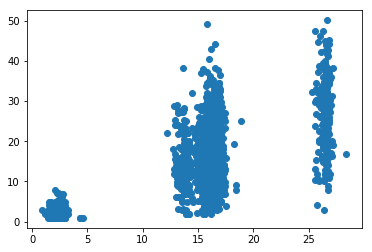

In [44]:
# style.use('bmh')
plt.scatter(regr.predict(x_test1),y_test1)
plt.show()

In [45]:
x= regr.fit(x_train,y_train)

In [46]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [47]:
model = sm.OLS(y_train,x_train)

In [48]:
result = model.fit()

In [49]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        No_of_sold_item   R-squared:                       0.432
Model:                            OLS   Adj. R-squared:                  0.429
Method:                 Least Squares   F-statistic:                     161.3
Date:                Fri, 12 Apr 2019   Prob (F-statistic):               0.00
Time:                        08:12:45   Log-Likelihood:                -22813.
No. Observations:                6818   AIC:                         4.569e+04
Df Residuals:                    6785   BIC:                         4.592e+04
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Item_MRP                            0.0084      0.003      2.933      0.003       0.003       0.014
Item_Visibility                     1.6652      1.749      0.952      0.341      -1.764       5.094
Item_Weight                        -0.1062      0.035     -3.001      0.003      -0.176      -0.037
years of operation                  0.2810      0.046      6.154      0.000       0.191       0.371
MRP_per_weight                     -0.0706      0.028     -2.521      0.012      -0.126      -0.016
Item_Visibility_MeanRatio           0.0478      1.303      0.037      0.971      -2.506       2.602
Item_Fat_Content_Low Fat Drink      0.6225      0.392      1.587      0.113      -0.146       1.391
Item_Fat_Content_Non Edible         0.3080      0.178      1.733      0.083      -0.040       0.656
Item_Fat_Content_Regular            0.1891      0.198      0.955      0.340      -0.199       0.577
Item_Fat_Content_Regular Drink     -0.0402      0.689     -0.058      0.954      -1.392       1.311
Item_Type_Breads                    0.4989      0.570      0.876      0.381      -0.618       1.616
Item_Type_Breakfast                -0.1627      0.770     -0.211      0.833      -1.673       1.348
Item_Type_Canned                    0.2643      0.429      0.617      0.537      -0.576       1.105
Item_Type_Dairy                    -0.7354      0.454     -1.618      0.106      -1.626       0.156
Item_Type_Dairy_Drink               0.4263      0.551      0.774      0.439      -0.653       1.506
Item_Type_Frozen Foods             -0.1877      0.401     -0.468      0.640      -0.975       0.599
Item_Type_Fruits and Vegetables     0.1882      0.377      0.499      0.618      -0.551       0.927
Item_Type_Hard Drinks               0.0108      0.485      0.022      0.982      -0.939       0.961
Item_Type_Health and Hygiene       -0.0803      0.307     -0.262      0.793      -0.681       0.521
Item_Type_Household                 0.0149      0.274      0.055      0.956      -0.521       0.551
Item_Type_Meat                     -0.0482      0.483     -0.100      0.920      -0.996       0.899
Item_Type_Others                    0.3733      0.435      0.858      0.391      -0.479       1.226
Item_Type_Seafood                   1.9387      1.031      1.880      0.060      -0.082       3.960
Item_Type_Snack Foods               0.0617      0.377      0.164      0.870      -0.677       0.800
Item_Type_Soft Drinks               0.1453      0.364      0.399      0.690      -0.568       0.858
Item_Type_Starchy Foods             0.1971      0.722      0.273      0.785      -1.219       1.613
Outlet_Identifier_OUT013            1.2266      0.385      3.187      0.001       0.472       1.981
Outlet_Identifier_OUT017            1.5680      0.183      8.567      0.000       1

# random forest

In [50]:
from sklearn.ensemble import RandomForestRegressor


clf=RandomForestRegressor()

param_dist = {"n_estimators":[1350,1400],
              "max_features": [20,25,30,35],
              "bootstrap": [True],
                'max_depth':[4,5,6],
                'min_samples_leaf':[12,10,8], 
                'min_samples_split':[11,9,10]
                  }

In [51]:
36*9

324

In [69]:
from sklearn.model_selection import RandomizedSearchCV

# run randomized search
n_iter_search = 32
# n_iter parameter of RandomizedSeacrhCV controls, how many 
# parameter combination will be tried; out of all possible given values

random_search = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=n_iter_search,cv=10,n_jobs=-1,verbose=1)

In [70]:
x_test.head()

,Item_MRP,Item_Visibility,Item_Weight,years of operation,MRP_per_weight,Item_Visibility_MeanRatio,Item_Fat_Content_Low Fat Drink,Item_Fat_Content_Non Edible,Item_Fat_Content_Regular,Item_Fat_Content_Regular Drink,...,Outlet_Identifier_OUT049,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Identifier_Food,Identifier_Non Consumable
0,107.8622,0.007565,20.750,14,5.198178,0.914837,0,0,0,0,...,1,0,0,1,0,1,0,0,1,0
1,87.3198,0.038428,8.300,6,10.520458,1.004721,0,0,1,0,...,0,1,0,1,0,1,0,0,1,0
2,241.7538,0.099575,14.600,15,16.558479,1.542414,0,1,0,0,...,0,0,1,1,0,0,0,0,0,1
3,155.0340,0.015388,7.315,6,21.193985,1.004560,0,0,0,0,...,0,1,0,1,0,1,0,0,1,0
4,234.2300,0.118599,13.600,28,17.222794,0.917824,0,0,1,0,...,0,0,1,1,0,0,0,1,1,0


In [71]:
random_search.fit(x_train, y_train)

RandomizedSearchCV(cv=10, error_score='raise-deprecating',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=32, n_jobs=-1,
          param_distributions={'n_estimators': [1350, 1400], 'max_features': [20, 25, 30, 35], 'bootstrap': [True], 'max_depth': [4, 5, 6], 'min_samples_leaf': [12, 10, 8], 'min_samples_split': [11, 9, 10]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

In [72]:
random_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=4,
           max_features=35, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=12,
           min_samples_split=10, min_weight_fraction_leaf=0.0,
           n_estimators=1350, n_jobs=None, oob_score=False,
           random_state=None, verbose=0, warm_start=False)

In [73]:
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.5f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [74]:
report(random_search.cv_results_,5)

Model with rank: 1
Mean validation score: 0.426 (std: 0.03579)
Parameters: {'n_estimators': 1350, 'min_samples_split': 10, 'min_samples_leaf': 12, 'max_features': 35, 'max_depth': 4, 'bootstrap': True}

Model with rank: 2
Mean validation score: 0.426 (std: 0.03583)
Parameters: {'n_estimators': 1400, 'min_samples_split': 9, 'min_samples_leaf': 10, 'max_features': 35, 'max_depth': 4, 'bootstrap': True}

Model with rank: 3
Mean validation score: 0.426 (std: 0.03596)
Parameters: {'n_estimators': 1400, 'min_samples_split': 11, 'min_samples_leaf': 10, 'max_features': 35, 'max_depth': 4, 'bootstrap': True}

Model with rank: 4
Mean validation score: 0.426 (std: 0.03604)
Parameters: {'n_estimators': 1400, 'min_samples_split': 11, 'min_samples_leaf': 8, 'max_features': 35, 'max_depth': 4, 'bootstrap': True}

Model with rank: 5
Mean validation score: 0.426 (std: 0.03630)
Parameters: {'n_estimators': 1350, 'min_samples_split': 11, 'min_samples_leaf': 10, 'max_features': 30, 'max_depth': 5, 'bootst

In [81]:
rf=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=4,
           max_features=44,
           min_samples_leaf=12, min_samples_split=10, n_estimators=1350)

In [82]:
clf.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [83]:
predicted = clf.predict(x_test1)

In [84]:
residual=predicted - y_test1

rmse_lm=np.sqrt(np.dot(residual,residual)/len(y_test))

rmse_lm

4.198244063237769

In [85]:
predicted1 = clf.predict(x_test)

np.savetxt('foo.csv',predicted1,delimiter=',')



# # linear regression

In [68]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn import cross_validation

In [69]:
lm= LinearRegression()

In [70]:
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [71]:
lm.predict(test)

array([16.08666653, 16.35787958,  2.79340575, ..., 15.72196129,
       17.50366677, 16.12993683])

In [745]:
np.savetxt('foo.csv',predicted,delimiter=',')

# lasso

In [38]:
from sklearn.linear_model import Ridge,Lasso
from sklearn.model_selection import GridSearchCV

In [841]:
alphas = np.linspace(0.3,0.6,100)

In [842]:
params={'alpha':alphas}

In [843]:
ridg=Ridge(fit_intercept=True)

In [844]:
grid_search = GridSearchCV(ridg, param_grid=params,cv=10,scoring='neg_mean_absolute_error')

In [847]:
x_train.drop('source',1,inplace=True)

In [848]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': array([0.3    , 0.30303, ..., 0.59697, 0.6    ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_absolute_error', verbose=0)

In [849]:
grid_search.best_estimator_

Ridge(alpha=0.4242424242424242, copy_X=True, fit_intercept=True,
   max_iter=None, normalize=False, random_state=None, solver='auto',
   tol=0.001)

In [850]:
report(grid_search.cv_results_,5)

Model with rank: 1
Mean validation score: -5.315 (std: 0.19248)
Parameters: {'alpha': 0.4242424242424242}

Model with rank: 2
Mean validation score: -5.315 (std: 0.19248)
Parameters: {'alpha': 0.42727272727272725}

Model with rank: 3
Mean validation score: -5.315 (std: 0.19248)
Parameters: {'alpha': 0.4212121212121212}

Model with rank: 4
Mean validation score: -5.315 (std: 0.19248)
Parameters: {'alpha': 0.4303030303030303}

Model with rank: 5
Mean validation score: -5.315 (std: 0.19248)
Parameters: {'alpha': 0.43333333333333335}



In [851]:
predicted=grid_search.predict(test)

In [853]:
np.savetxt('foo.csv',predicted)

In [860]:
ridge_model=grid_search.best_estimator_

In [861]:
ridge_model.fit(x_train,y_train)

Ridge(alpha=0.4242424242424242, copy_X=True, fit_intercept=True,
   max_iter=None, normalize=False, random_state=None, solver='auto',
   tol=0.001)

In [862]:
list(zip(x_train.columns,ridge_model.coef_))

[('Item_MRP', 0.007044425995267231),
 ('Item_Visibility', 0.7203765366343915),
 ('Item_Weight', -0.07312271534153647),
 ('years of operation', 0.20004244953670985),
 ('MRP_per_weight', -0.057111297982310585),
 ('Item_Visibility_MeanRatio', 0.5640761829934736),
 ('Item_Fat_Content_Low Fat Drink', 0.2483401571142523),
 ('Item_Fat_Content_Non Edible', 0.04185619695464656),
 ('Item_Fat_Content_Regular', 0.3079146962672416),
 ('Item_Fat_Content_Regular Drink', -0.2769126195873306),
 ('Item_Type_Breads', 0.36762243917044657),
 ('Item_Type_Breakfast', -0.47770714830269706),
 ('Item_Type_Canned', 0.3210017376343203),
 ('Item_Type_Dairy', -0.5976001091322882),
 ('Item_Type_Dairy_Drink', 0.22778126403109558),
 ('Item_Type_Frozen Foods', -0.36333521505869737),
 ('Item_Type_Fruits and Vegetables', 0.1740576074611095),
 ('Item_Type_Hard Drinks', -0.21175480258472978),
 ('Item_Type_Health and Hygiene', 0.11614101218897652),
 ('Item_Type_Household', -0.10632562105548812),
 ('Item_Type_Meat', 0.106412

# lasso

In [39]:
lambdas=np.linspace(0.01,0.011,100)
model=Lasso(fit_intercept=True)
params={'alpha':lambdas}

In [40]:
grid_search=GridSearchCV(model,param_grid=params,cv=10,scoring='neg_mean_absolute_error')

In [41]:
grid_search.fit(x_train,y_train)

NameError: name 'x_train' is not defined

In [89]:
grid_search.best_estimator_

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [90]:
report(grid_search.cv_results_,3)

Model with rank: 1
Mean validation score: -5.314 (std: 0.19386)
Parameters: {'alpha': 0.01}

Model with rank: 2
Mean validation score: -5.314 (std: 0.19386)
Parameters: {'alpha': 0.01001010101010101}

Model with rank: 3
Mean validation score: -5.314 (std: 0.19385)
Parameters: {'alpha': 0.010020202020202021}



In [91]:
predicted = grid_search.predict(test)

In [92]:
np.savetxt('foo.csv',predicted)

# GBM

In [74]:
from sklearn.ensemble import GradientBoostingRegressor

In [84]:
gbm_params={'n_estimators':[50,100,200,500,700],
           'learning_rate': [0.01,.05,0.1,0.4,0.8],
            'max_depth':[1,2,3,4,5,6],
#             'min_samples_split':[2,5,10,20],
#             'min_samples_leaf':[2,5,10,20],
            'subsample':[0.5,0.8,1],
            'max_features':[5,10,15,20,30,40]
           }


In [112]:
gbm_params={'n_estimators':[40,45,50],
           'learning_rate': [0.05,.08,0.1,0.2,0.3],
            'max_depth':[3,4,5,6],
            'subsample':[0.6,0.8,1],
            'max_features':[15,20,30]
           }


In [113]:
144*5

720

In [114]:
gbm=GradientBoostingRegressor()

In [115]:
random_search=RandomizedSearchCV(gbm,scoring='neg_mean_absolute_error',param_distributions=gbm_params,
                                 cv=10,n_iter=54,
                                 n_jobs=-1)

In [116]:
random_search.fit(x_train,y_train)

RandomizedSearchCV(cv=10, error_score='raise',
          estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=54, n_jobs=-1,
          param_distributions={'n_estimators': [40, 45, 50], 'learning_rate': [0.05, 0.08, 0.1, 0.2, 0.3], 'max_depth': [3, 4, 5, 6], 'subsample': [0.6, 0.8, 1], 'max_features': [15, 20, 30]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='neg_mean_absolute_error',
          verbose=0)

In [117]:
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.5f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [118]:
report(random_search.cv_results_,5)

Model with rank: 1
Mean validation score: -5.350 (std: 0.20697)
Parameters: {'subsample': 0.8, 'n_estimators': 45, 'max_features': 20, 'max_depth': 5, 'learning_rate': 0.1}

Model with rank: 2
Mean validation score: -5.353 (std: 0.20937)
Parameters: {'subsample': 0.6, 'n_estimators': 40, 'max_features': 15, 'max_depth': 4, 'learning_rate': 0.1}

Model with rank: 3
Mean validation score: -5.354 (std: 0.19735)
Parameters: {'subsample': 0.8, 'n_estimators': 50, 'max_features': 20, 'max_depth': 5, 'learning_rate': 0.08}

Model with rank: 4
Mean validation score: -5.356 (std: 0.20555)
Parameters: {'subsample': 0.8, 'n_estimators': 50, 'max_features': 20, 'max_depth': 3, 'learning_rate': 0.1}

Model with rank: 5
Mean validation score: -5.357 (std: 0.20103)
Parameters: {'subsample': 0.8, 'n_estimators': 50, 'max_features': 20, 'max_depth': 4, 'learning_rate': 0.08}



In [295]:
predict = random_search.predict(x_test)

In [297]:
np.savetxt('foo.csv',predict)

# XGBOOST

In [55]:
!pip install xgboost

You are using pip version 9.0.1, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [84]:
from sklearn.ensemble import GradientBoostingRegressor
from xgboost.sklearn import XGBRegressor

In [85]:
xgb_params = {  
                "n_estimators":[30,40,50,70,90,100,200,300,400,500,600,700,800,1000,1200,1300]
             }

In [86]:
xgb1=XGBRegressor(learning_rate=0.1,subsample=0.8,colsample_bylevel=0.8,colsample_bytree=0.8)

In [87]:
from sklearn.model_selection import GridSearchCV

In [88]:
grid_search=GridSearchCV(xgb1,cv=10,param_grid=xgb_params,scoring='neg_mean_absolute_error',verbose=2,n_jobs=-1)

In [89]:
grid_search.fit(x_train,y_train)

Fitting 10 folds for each of 16 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   14.0s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:  7.8min finished


GridSearchCV(cv=10, error_score='raise',
       estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=0.8,
       colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=0.8),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [30, 40, 50, 70, 90, 100, 200, 300, 400, 500, 600, 700, 800, 1000, 1200, 1300]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_absolute_error', verbose=2)

In [95]:
grid_search.cv_results_

C:\Users\gauravk\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\gauravk\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\gauravk\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_

{'mean_fit_time': array([ 0.70726867,  1.09113204,  1.25005286,  1.84252312,  2.32243066,
         2.58711135,  5.5253026 ,  7.24433713,  9.02697456, 11.04420006,
        13.38307853, 16.34078588, 20.87573502, 26.89493239, 29.38104968,
        30.30855014]),
 'mean_score_time': array([0.00468299, 0.001561  , 0.00780494, 0.00737464, 0.00381238,
        0.00312197, 0.01599019, 0.00874553, 0.01598046, 0.02836809,
        0.02254431, 0.03037944, 0.03225901, 0.04050982, 0.04901185,
        0.04526088]),
 'mean_test_score': array([-5.3266629 , -5.33873741, -5.34965373, -5.35999805, -5.36875669,
        -5.37167527, -5.40124536, -5.44041646, -5.47546175, -5.50076268,
        -5.52836692, -5.560368  , -5.5863626 , -5.63226334, -5.67996533,
        -5.69604678]),
 'mean_train_score': array([-5.28843315, -5.2734323 , -5.26122795, -5.22515336, -5.19054646,
        -5.17359429, -5.02787972, -4.90549854, -4.79511756, -4.68982636,
        -4.59615297, -4.50576189, -4.42110312, -4.26200625, -4.116405

In [80]:
report(grid_search.cv_results_,5)

Model with rank: 1
Mean validation score: -5.327 (std: 0.20237)
Parameters: {'n_estimators': 30}

Model with rank: 2
Mean validation score: -5.339 (std: 0.20337)
Parameters: {'n_estimators': 40}

Model with rank: 3
Mean validation score: -5.350 (std: 0.20064)
Parameters: {'n_estimators': 50}

Model with rank: 4
Mean validation score: -5.360 (std: 0.19856)
Parameters: {'n_estimators': 70}

Model with rank: 5
Mean validation score: -5.369 (std: 0.20221)
Parameters: {'n_estimators': 90}



In [81]:
xgb_params={
            "gamma":[0,2,5,8,10],
            "max_depth": [2,3,4,5,6,7,8],
            "min_child_weight":[0.5,1,2,5,10]
            }

In [83]:
xgb2=XGBRegressor(learning_rate=0.1,n_estimators=30,subsample=0.8,colsample_bylevel=0.8,colsample_bytree=0.8)

In [86]:
random_search=RandomizedSearchCV(xgb2,param_distributions=xgb_params,n_iter=20,cv=10,scoring='neg_mean_absolute_error',
                                 n_jobs=-1,verbose=2)

In [87]:
random_search.fit(x_train,y_train)

Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   16.2s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   47.0s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   58.0s finished


RandomizedSearchCV(cv=10, error_score='raise',
          estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=0.8,
       colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=30,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=0.8),
          fit_params=None, iid=True, n_iter=20, n_jobs=-1,
          param_distributions={'gamma': [0, 2, 5, 8, 10], 'max_depth': [2, 3, 4, 5, 6, 7, 8], 'min_child_weight': [0.5, 1, 2, 5, 10]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='neg_mean_absolute_error',
          verbose=2)

In [88]:
report(random_search.cv_results_,5)

Model with rank: 1
Mean validation score: -5.314 (std: 0.19998)
Parameters: {'min_child_weight': 2, 'max_depth': 4, 'gamma': 8}

Model with rank: 2
Mean validation score: -5.315 (std: 0.20195)
Parameters: {'min_child_weight': 0.5, 'max_depth': 4, 'gamma': 8}

Model with rank: 3
Mean validation score: -5.319 (std: 0.20207)
Parameters: {'min_child_weight': 5, 'max_depth': 5, 'gamma': 0}

Model with rank: 4
Mean validation score: -5.321 (std: 0.20350)
Parameters: {'min_child_weight': 2, 'max_depth': 5, 'gamma': 2}

Model with rank: 5
Mean validation score: -5.321 (std: 0.19940)
Parameters: {'min_child_weight': 0.5, 'max_depth': 5, 'gamma': 5}



In [89]:
xgb_params={
            'subsample':[i/10 for i in range(5,11)],
            'colsample_bytree':[i/10 for i in range(5,11)],
            'colsample_bylevel':[i/10 for i in range(5,11)]
            }

In [90]:
xgb4=XGBRegressor(learning_rate=0.1,n_estimators=30,min_child_weight=2,gamma=8,max_depth=4)

In [91]:
random_search=RandomizedSearchCV(xgb4,param_distributions=xgb_params,cv=10,n_iter=30,scoring='neg_mean_absolute_error',
                                n_jobs=-1,verbose=20)

In [93]:
random_search.fit(x_train,y_train)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:    8.0s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    8.7s
[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed:    8.9s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    9.1s
[Paralle

[Parallel(n_jobs=-1)]: Done 135 tasks      | elapsed:   35.8s
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:   36.0s
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:   36.3s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   36.3s
[Parallel(n_jobs=-1)]: Done 139 tasks      | elapsed:   36.4s
[Parallel(n_jobs=-1)]: Done 140 tasks      | elapsed:   36.8s
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed:   37.3s
[Parallel(n_jobs=-1)]: Done 142 tasks      | elapsed:   37.4s
[Parallel(n_jobs=-1)]: Done 143 tasks      | elapsed:   37.5s
[Parallel(n_jobs=-1)]: Done 144 tasks      | elapsed:   37.9s
[Parallel(n_jobs=-1)]: Done 145 tasks      | elapsed:   38.4s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   38.5s
[Parallel(n_jobs=-1)]: Done 147 tasks      | elapsed:   38.5s
[Parallel(n_jobs=-1)]: Done 148 tasks      | elapsed:   39.2s
[Parallel(n_jobs=-1)]: Done 149 tasks      | elapsed:   39.2s
[Parallel(n_jobs=-1)]: Done 150 tasks      | elapsed:   39.5s
[Paralle

[Parallel(n_jobs=-1)]: Done 268 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 269 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 270 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 271 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 273 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 274 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 275 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 276 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 277 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 278 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 279 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 281 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 282 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 283 tasks      | elapsed:  1.1min
[Paralle

RandomizedSearchCV(cv=10, error_score='raise',
          estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=8, learning_rate=0.1, max_delta_step=0,
       max_depth=4, min_child_weight=2, missing=None, n_estimators=30,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
          fit_params=None, iid=True, n_iter=30, n_jobs=-1,
          param_distributions={'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0], 'colsample_bytree': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0], 'colsample_bylevel': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='neg_mean_absolute_error',
          verbose=20)

In [94]:
report(random_search.cv_results_,3)

Model with rank: 1
Mean validation score: -5.306 (std: 0.20166)
Parameters: {'subsample': 0.8, 'colsample_bytree': 1.0, 'colsample_bylevel': 0.8}

Model with rank: 2
Mean validation score: -5.308 (std: 0.19949)
Parameters: {'subsample': 0.7, 'colsample_bytree': 1.0, 'colsample_bylevel': 0.7}

Model with rank: 3
Mean validation score: -5.309 (std: 0.19621)
Parameters: {'subsample': 1.0, 'colsample_bytree': 0.8, 'colsample_bylevel': 0.8}



In [96]:
xgb5=XGBRegressor(learning_rate=0.1,n_estimators=30,min_child_weight=2,gamma=8,max_depth=4,
                   colsample_bylevel= 0.8, colsample_bytree= 1, subsample= 0.8
                  )

In [97]:
xgb_params={
            'reg_lambda':[i/10 for i in range(0,50)],
            'reg_alpha':[i/10 for i in range(0,50)]
            }

In [100]:
random_search=RandomizedSearchCV(xgb5,param_distributions=xgb_params,cv=10,n_iter=50,scoring='neg_mean_absolute_error',
                                n_jobs=-1,verbose=10)

In [101]:
random_search.fit(x_train,y_train)

Fitting 10 folds for each of 50 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    8.9s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   10.9s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   13.7s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   16.4s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:   19.3s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   22.2s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:   26.0s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:   29.6s
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:   33.9s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   38.0s
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:   42.9s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   47.2s
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:   51.5s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   56.2s
[Paralle

RandomizedSearchCV(cv=10, error_score='raise',
          estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=0.8,
       colsample_bytree=1, gamma=8, learning_rate=0.1, max_delta_step=0,
       max_depth=4, min_child_weight=2, missing=None, n_estimators=30,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=0.8),
          fit_params=None, iid=True, n_iter=50, n_jobs=-1,
          param_distributions={'reg_lambda': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0, 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4.0, 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9], 'reg_alpha': ...3.0, 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4.0, 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
       

In [103]:
report(random_search.cv_results_,5)

Model with rank: 1
Mean validation score: -5.303 (std: 0.20217)
Parameters: {'reg_lambda': 1.2, 'reg_alpha': 3.0}

Model with rank: 2
Mean validation score: -5.304 (std: 0.20247)
Parameters: {'reg_lambda': 1.2, 'reg_alpha': 2.3}

Model with rank: 3
Mean validation score: -5.304 (std: 0.20118)
Parameters: {'reg_lambda': 1.3, 'reg_alpha': 0.0}

Model with rank: 4
Mean validation score: -5.304 (std: 0.20363)
Parameters: {'reg_lambda': 0.3, 'reg_alpha': 4.2}

Model with rank: 5
Mean validation score: -5.304 (std: 0.20575)
Parameters: {'reg_lambda': 0.5, 'reg_alpha': 1.8}



In [105]:
xgb6=XGBRegressor(learning_rate=0.1,n_estimators=30,min_child_weight=2,gamma=8,max_depth=4,
                   colsample_bylevel= 0.8, colsample_bytree= 1, subsample= 0.8,
                  reg_lambda=1.2,reg_alpha=3)

In [113]:
xgb_params={}

In [117]:
random_search=RandomizedSearchCV(xgb5,param_distributions=xgb_params,cv=10,n_iter=1,scoring='neg_mean_absolute_error',
                                n_jobs=-1,verbose=10)

In [118]:
random_search.fit(x_train,y_train)

Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    6.1s remaining:    6.1s
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    7.1s remaining:    3.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    7.3s finished


RandomizedSearchCV(cv=10, error_score='raise',
          estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=0.8,
       colsample_bytree=1, gamma=8, learning_rate=0.1, max_delta_step=0,
       max_depth=4, min_child_weight=2, missing=None, n_estimators=30,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=0.8),
          fit_params=None, iid=True, n_iter=1, n_jobs=-1,
          param_distributions={}, pre_dispatch='2*n_jobs',
          random_state=None, refit=True, return_train_score='warn',
          scoring='neg_mean_absolute_error', verbose=10)

In [119]:
predict = random_search.predict(test)

In [121]:
np.savetxt('foo.csv',predict)